<a href="https://colab.research.google.com/github/ersjunior/3DTS-DataProcessingWithPython/blob/main/Desafios/desafio_A4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercício Aula 4

* Escolha uma base de dados no
https://www.kaggle.com/datasets

* Se familiarize com sua base, não esqueça de
junto com seus códigos realizar suas
análises/conclusões (use o botão de +Texto).

* Realize sumarizacoes. Veja qual tipo de gráfico
é útil para sua análise se barras, linha ou pizza

In [ ]:
"""
Para o desafio da aula 4, escolhi um dataset no kaggle 
que traz informações sobre casos extra conjugais.

A amostra contém as informações:

Dados de infidelidade, conhecidos como Fair's Affairs. 
Dados de corte transversal de uma pesquisa feita pela Psychology Today em 1969.

Formato
Tabela de dados contendo 601 observações em 9 variáveis.

Casos extraconjugais
Tipo numérico. 
Com que frequência teve relações sexuais extraconjugais durante o último ano? 
0 = nenhum, 
1 = uma vez, 
2 = duas vezes, 
3 = 3 vezes, 
7 = 4–10 vezes, 
12 = mensalmente, 
12 = semanalmente, 
12 = diariamente.

gênero
Tipo bool
fator que indica sexo.

idade
Tipo numérico. 
Codificando a idade em anos: 
17,5 = menos de 20 anos, 
22 = 20–24, 
27 = 25–29, 
32 = 30–34, 
37 = 35–39, 
42 = 40–44, 
47 = 45–49, 
52 = 50–54, 
57 = 55 ou mais.

anos casados
Tipo numérico. 
número de anos de casamento: 
0,125 = 3 meses ou menos, 
0,417 = 4–6 meses, 
0,75 = 6 meses–1 ano, 
1,5 = 1–2 anos, 
4 = 3–5 anos, 
7 = 6–8 anos, 
10 = 9–11 anos, 
15 = 12 ou mais anos.

Filhos
Tipo bool
fator, há filhos no casamento?

religiosidade
Tipo numérico. 
codificando religiosidade: 
1 = anti, (Ateu) 
2 = nada, (Agnostico)
3 = ligeiramente, 
4 = um pouco, 
5 = muito.

Educação
Tipo numérico. 
codificação nível de educação: 
9 = ensino fundamental, 
12 = pós-graduação, 
14 = alguma faculdade, 
16 = pós-graduação, 
17 = algum trabalho de pós-graduação, 
18 = mestrado, 
20 = Ph.D., MD ou outro grau avançado.

ocupação
Tipo numérico.
codifica a ocupação de acordo com a classificação de Hollingshead
(numeração reversa).

avaliação
Tipo numérico.
codifica a autoavaliação do casamento: 
1 = muito infeliz, 
2 = um pouco infeliz, 
3 = mediano, 
4 = mais feliz que a média, 
5 = muito feliz.
"""

# Importando as bibliotécas



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from google.colab import drive

In [ ]:
# Monta o Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Caminho completo do arquivo CSV no Google Drive
caminho_arquivo = '/content/drive/MyDrive/Affairs.csv'

# Lendo o arquivo CSV e carregando em um DataFrame
df = pd.read_csv(caminho_arquivo)

# Renomeando as colunas
df = df.rename(columns={
    'affairs': 'Casos', 
    'gender': 'Genero', 
    'age': 'Idade',
    'yearsmarried': 'TempoCasado',
    'children': 'Filhos',
    'religiousness': 'Religiosidade',
    'education': 'Educacao',
    'occupation': 'Ocupacao',
    'rating': 'Satisfacao'
    })

In [ ]:
# Visualizando o dataframe
df.head()

,Unnamed: 0,Casos,Genero,Idade,TempoCasado,Filhos,Religiosidade,Educacao,Ocupacao,Satisfacao
0,4,0,male,37.0,10.00,no,3,18,7,4
1,5,0,female,27.0,4.00,no,4,14,6,4
2,11,0,female,32.0,15.00,yes,1,12,1,4
3,16,0,male,57.0,15.00,yes,5,18,6,5
4,23,0,male,22.0,0.75,no,2,17,6,3


In [ ]:
# Divisão de fidelidade e infelidade

# Quantidade de pessoas fiéis
fidelidade = df[df["Casos"]==0]

# QUantidade de pessoas infiéis
infidelidade = df[df["Casos"]>0]

In [ ]:
# Criando uma função para os gráficos de barras

def bar_plot(hist_fidelidade,hist_infidelidade,xlabel,xticklabels):
  fig=plt.figure()
  
  # Eixos
  ax=fig.add_axes([0,0,1,1])
  xticks=np.arange(len(xticklabels))
  ax.set_xticks(xticks)
  ax.set_xticklabels(xticklabels)
  plt.xlabel(xlabel)
  plt.ylabel("[%]")
  
  # Barras
  ax.bar(xticks-.75/4,hist_fidelidade,color="tab:blue",width=.75/2)
  ax.bar(xticks+.75/4,hist_infidelidade,color="tab:red",width=.75/2)
  
  # Anotações
  if len(xticks)==2:
    plt.text(-.75/4,hist_fidelidade.values[0],"Fidelidade",
             c="tab:blue",ha="center",va="bottom")
    
    plt.text(.75/4,hist_infidelidade.values[0],"Infidelidade",
             c="tab:red",ha="center",va="bottom")
  else:
    plt.text(-.75/4,hist_fidelidade.values[0]," Fidelidade",
             c="tab:blue",ha="center",va="bottom",rotation=90)
    
    plt.text(.75/4,hist_infidelidade.values[0]," Infidelidade",
             c="tab:red",ha="center",va="bottom",rotation=90)
  plt.show()

# Visão de fidelidade e Infidelidade por Gênero

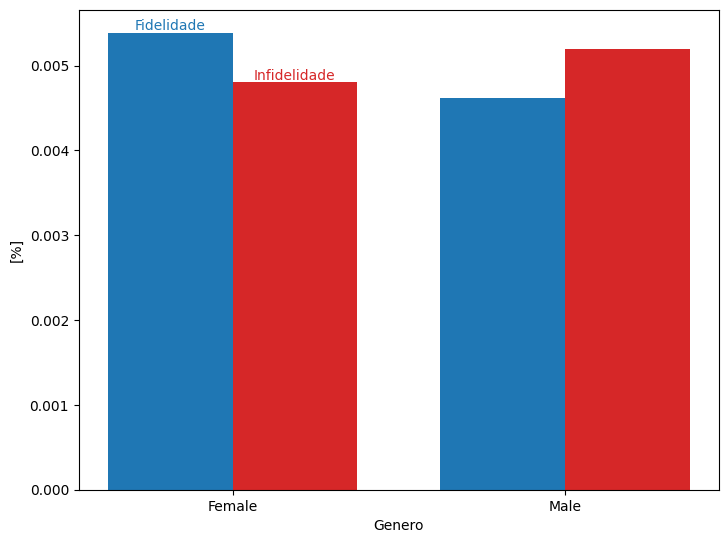

In [ ]:
# Gráfico de barras comparando Gênero
fieis = fidelidade.shape[0] / .01
infieis = infidelidade.shape[0] / .01
xticklabels = ["female","male"]

hist_ff = fidelidade["Genero"].value_counts()[xticklabels] / fieis
hist_uff = infidelidade["Genero"].value_counts()[xticklabels] / infieis
xticklabels = [_.title() for _ in xticklabels]

bar_plot(hist_ff,hist_uff, "Genero", xticklabels)

* Gênero - Assumindo que o conjunto de dados representa uma amostra aleatória da população, se não houver correlação entre sexo e fidelidade, a proporção de mulheres para homens deve ser semelhante entre os grupos "fiéis" e "infiéis".

* Da mesma forma, se houver correlação, o equilíbrio de gênero deve diferir entre os dois grupos. Indo do grupo "fiel" para o grupo "infiel", o equilíbrio de gênero se inclina para o sexo masculino, sugerindo que os homens podem estar mais inclinados a trair.



# Visualização por faixas de idade

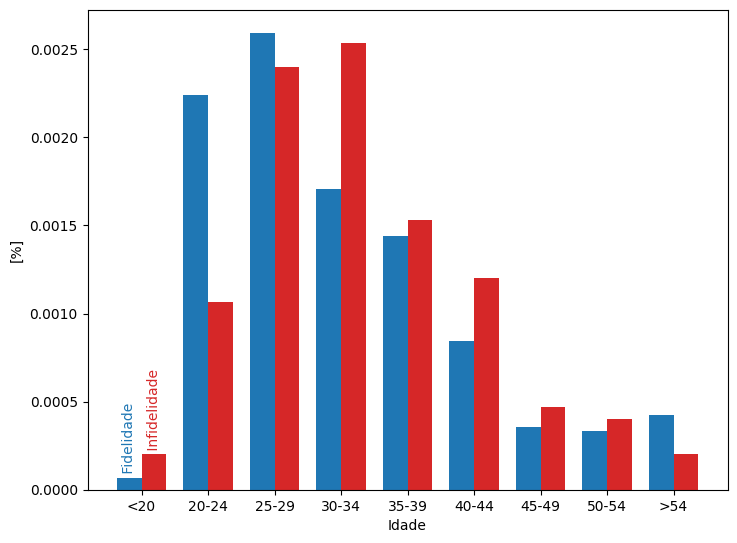

In [ ]:
# Gráfico de barras comparando a fidelidade por faixas de idade
faixa = [0,17.5,22,27,32,37,42,47,52,57]
xticklabels = [
    "<20","20-24","25-29",
    "30-34","35-39","40-44",
    "45-49","50-54",">54"
    ]

qtd_fieis = pd.cut(fidelidade['Idade'], bins=faixa, labels=xticklabels)
hist_ff = qtd_fieis.value_counts(sort=False) / fieis

qtd_infieis = pd.cut(infidelidade['Idade'], bins=faixa, labels=xticklabels)
hist_uff = qtd_infieis.value_counts(sort=False) / infieis

bar_plot(hist_ff, hist_uff, 'Idade', xticklabels)

* Idade - Seguindo o mesmo argumento, se não houver correlação entre idade e fidelidade, a distribuição etária deveria ser semelhante entre os grupos "fiéis" e "infiéis" e diferente nos demais. 

* Indo do grupo "fiel" para o grupo "infiel", a distribuição se inclina para idades mais altas, sugerindo que indivíduos mais velhos podem estar mais inclinados a trapacear.



# Visão comparativa de fidelidade por:

* Tempo de casamento
* Se o casal possui filhos
* Nível de religiosidade do casal
* Satisfação no relacionamento


In [ ]:
# Gráfico de barras por anos de casamento
faixas_casamento = [0,.75,1.5,4,7,10,15]
xticklabels_tcasamento = [
    "<1", "1-2",
    "3-5", "6-8",
    "9-11", ">11"
    ]

qtd_fieis_tcasamento = pd.cut(fidelidade["TempoCasado"],
                              bins = faixas_casamento, 
                              labels = xticklabels_tcasamento)

hist_ff_tcasamento = qtd_fieis_tcasamento.value_counts(sort=False) / fieis

qtd_infieis_tcasamento = pd.cut(infidelidade["TempoCasado"],
                                bins = faixas_casamento,
                                labels = xticklabels_tcasamento)

hist_uff_tcasamento = qtd_infieis_tcasamento.value_counts(sort=False) / infieis

In [ ]:
# Gráfico de barras - casais com ou sem filhos
xticklabels_filhos = ["no","yes"]

hist_ff_filhos = fidelidade["Filhos"].value_counts()[xticklabels_filhos] / fieis
hist_uff_filhos = infidelidade["Filhos"].value_counts()[xticklabels_filhos] / infieis

xticklabels_filhos = [_.title() for _ in xticklabels_filhos]

In [ ]:
# Gráfico de visualização da religiosidade dos casais
nivel_religiosidade = list(range(6))
xticklabels_religiosidade = ["Anti","Not At All","Slightly","Somewhat","Very"]

qtd_fieis_religiosidade = pd.cut(fidelidade["Religiosidade"], 
                   bins = nivel_religiosidade, 
                   labels=xticklabels_religiosidade)

hist_ff_religiosidade = qtd_fieis_religiosidade.value_counts(sort=False) / fieis

qtd_infieis_religiosidade = pd.cut(infidelidade["Religiosidade"], 
                     bins = nivel_religiosidade, 
                     labels=xticklabels_religiosidade)

hist_uff_religiosidade = qtd_infieis_religiosidade.value_counts(sort=False) / infieis

In [ ]:
# Gráfico de comparação por nível de felicidade no matrimônio
nivel_satisfacao = list(range(6))
xticklabels_satisfacao = [
    "Very\nUnhappy",
    "Somewhat\nUnhappy",
    "Average",
    "Happier\nThan\nAverage",
    "Very\nHappy"
    ]

qtd_fieis_satisfacao = pd.cut(fidelidade["Satisfacao"], 
                   bins = nivel_satisfacao, 
                   labels = xticklabels_satisfacao)

hist_ff_satisfacao = qtd_fieis_satisfacao.value_counts(sort=False) / fieis

qtd_infieis_satisfacao = pd.cut(infidelidade["Satisfacao"], 
                     bins = nivel_satisfacao, 
                     labels = xticklabels_satisfacao)

hist_uff_satisfacao = qtd_infieis_satisfacao.value_counts(sort=False) / infieis

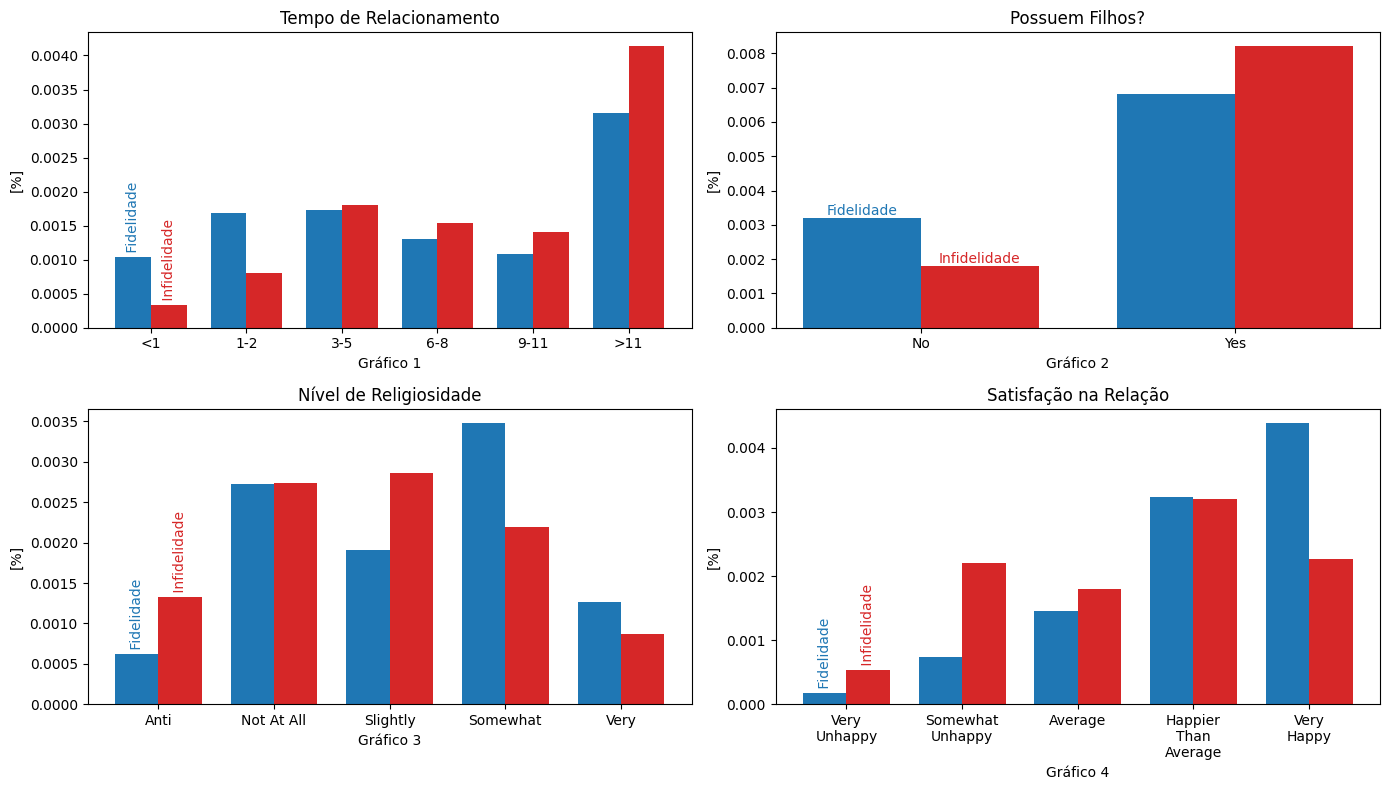

In [ ]:
# Criando a segunda função bar_plot4()
def bar_plot4(hist_fidelidade, hist_infidelidade, xlabel, xticklabels, ax):
    # Eixos
    xticks = np.arange(len(xticklabels))
    ax.set_xticks(xticks)
    ax.set_xticklabels(xticklabels)
    ax.set_xlabel(xlabel)
    ax.set_ylabel("[%]")

    # Barras
    ax.bar(xticks - 0.75/4, hist_fidelidade, color="tab:blue", width=0.75/2)
    ax.bar(xticks + 0.75/4, hist_infidelidade, color="tab:red", width=0.75/2)

    # Anotações
    if len(xticks) == 2:
        ax.text(-0.75/4, hist_fidelidade.values[0], "Fidelidade",
                c="tab:blue", ha="center", va="bottom")
        ax.text(0.75/4, hist_infidelidade.values[0], "Infidelidade",
                c="tab:red", ha="center", va="bottom")
    else:
        ax.text(-0.75/4, hist_fidelidade.values[0], " Fidelidade",
                c="tab:blue", ha="center", va="bottom", rotation=90)
        ax.text(0.75/4, hist_infidelidade.values[0], " Infidelidade",
                c="tab:red", ha="center", va="bottom", rotation=90)


# Criando uma figura e os subplots
fig, axs = plt.subplots(2, 2, figsize=(14, 8))

# Gráfico 1
bar_plot4(hist_ff_tcasamento, hist_uff_tcasamento, "Gráfico 1", xticklabels_tcasamento, axs[0, 0])
axs[0, 0].set_title("Tempo de Relacionamento")

# Gráfico 2
bar_plot4(hist_ff_filhos, hist_uff_filhos, "Gráfico 2", xticklabels_filhos, axs[0, 1])
axs[0, 1].set_title("Possuem Filhos?")

# Gráfico 3
bar_plot4(hist_ff_religiosidade, hist_uff_religiosidade, "Gráfico 3", xticklabels_religiosidade, axs[1, 0])
axs[1, 0].set_title("Nível de Religiosidade")

# Gráfico 4
bar_plot4(hist_ff_satisfacao, hist_uff_satisfacao, "Gráfico 4", xticklabels_satisfacao, axs[1, 1])
axs[1, 1].set_title("Satisfação na Relação")

# Ajusta o layout dos subplots
plt.tight_layout()

# Exibe a figura com os gráficos
plt.show()

* Anos de casamento, filhos, religiosidade e felicidade conjugal - Estendendo esta análise aos demais atributos, os "infiéis" são casados há mais tempo, têm mais filhos, são menos religiosos e menos felizes com o casamento do que os "fiéis"

* Com isso é sugerível que indivíduos com essas características podem estar mais inclinadas a trapacear.

# Comparação por nível de educação e nível social dos casais
* nível social (classificação de Hollingshead)

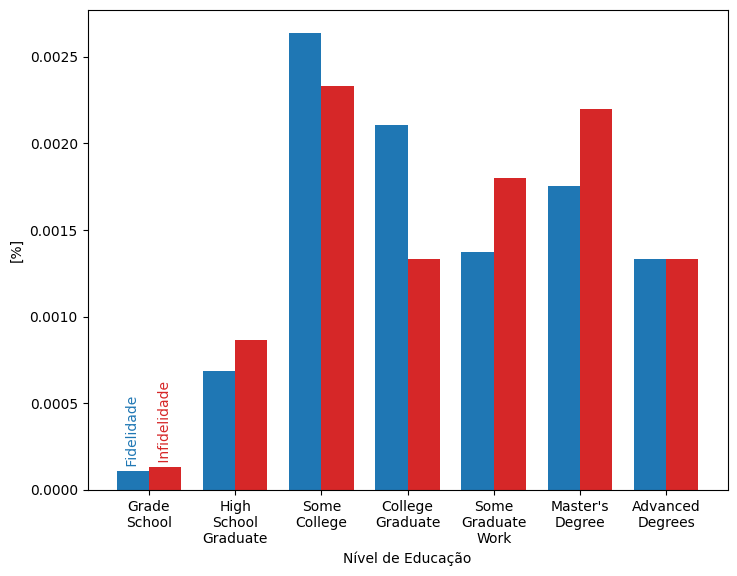

In [ ]:
# Gráfico de visualização por nível de educação
nivel=[0,9,12,14,16,17,18,20]
xticklabels=["Grade\nSchool",
             "High\nSchool\nGraduate",
             "Some\nCollege",
             "College\nGraduate",
             "Some\nGraduate\nWork",
             "Master's\nDegree",
             "Advanced\nDegrees"]

qtd_fieis = pd.cut(fidelidade["Educacao"], bins = nivel, labels=xticklabels)
hist_ff = qtd_fieis.value_counts(sort=False) / fieis

qtd_infieis = pd.cut(infidelidade["Educacao"], bins = nivel, labels=xticklabels)
hist_uff = qtd_infieis.value_counts(sort=False) / infieis

bar_plot(hist_ff,hist_uff,"Nível de Educação",xticklabels)

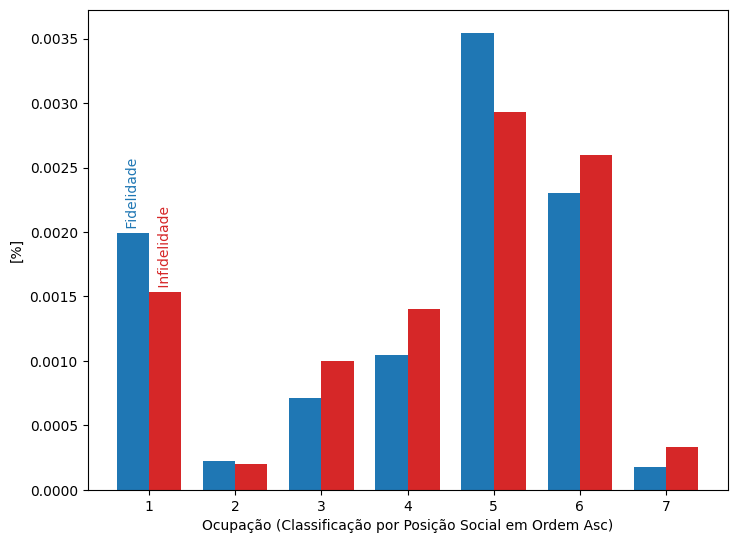

In [ ]:
# Gráfico de visualização por nível de ocupação (classificação de Hollingshead)
xticklabels=list(range(1,8))

hist_ff = fidelidade["Ocupacao"].value_counts()[xticklabels] / fieis
hist_uff = infidelidade["Ocupacao"].value_counts()[xticklabels] / infieis

xlabel=\
"Ocupação (Classificação por Posição Social em Ordem Asc)"

bar_plot(hist_ff,hist_uff,xlabel,
         xticklabels)

* Educação e ocupação - Embora a distribuição de educação e ocupação seja diferente entre os grupos "fiéis" e "infiéis", ao contrário do que observamos para os outros atributos, não há padrões óbvios. 


* Isso implica que a fidelidade pode estar correlacionada com a educação e a ocupação, mas é obscurecida pela forma como a educação e a ocupação são categorizadas e classificadas no conjunto de dados. 


* No caso da ocupação, o conjunto de dados faz uso da pontuação de ocupação de Hollingshead, que classifica as ocupações por posição social, em vez de outros fatores, como salário ou jornada de trabalho, que podem ser mais relevantes para a fidelidade.